In [2]:
import xarray as xr
import matplotlib.pylab as plt
import numpy as np
import xesmf as xe
from dask.diagnostics import ProgressBar
import matplotlib.pylab as plt
import glob
from dask.distributed import Client, LocalCluster


In [3]:
in_dir = "/data/ABOVE/MODIS/LAI_CLM_DOMAIN/"
out_dir = ("/data/ABOVE/MODIS/LAI_CLM_DOMAIN/processed/")

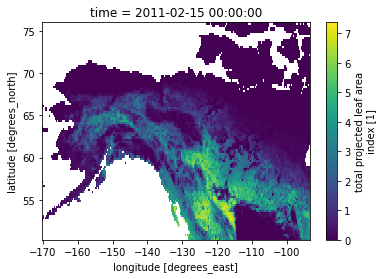

In [14]:
clm_image = xr.open_dataset(in_dir+"freeCLM5.1forILAMB.nc")
clm_image = clm_image["TLAI"].isel(time=1)


In [41]:
albedo = xr.open_dataarray("/data/ABOVE/Final_data/ALBEDO_Final/Monthly_Albedo/Albedo_May.nc")
albedo = albedo.rename({"x":"lon","y":"lat"})

In [42]:
ds_out = xr.Dataset({
    'lat': (['lat'], clm_image['lat'].values),
    'lon': (['lon'], clm_image['lon'].values)
})
ds_in = xr.Dataset({
    'lat': (['lat'], albedo['lat'].values),
    'lon': (['lon'], albedo['lon'].values)
})

In [43]:
# regridder = xe.Regridder(ds_in, ds_out, 'bilinear')
# regridder.to_netcdf(out_dir+"regridder_albedo_entire_clm_domain.nc")

In [44]:
albedo_regrided = regridder(albedo)

/data/home/hamiddashti/miniconda3/envs/conda_env/lib/python3.8/site-packages/xesmf/frontend.py:466: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  dr_out = xr.apply_ufunc(


In [45]:
albedo_regrided.isel(time=1).to_netcdf(out_dir+"test3.nc")
albedo.isel(time=1).to_netcdf(out_dir+"test4.nc")